## First model

### Set up

In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [27]:
from fastai.imports import *

In [28]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = '../../fastai/courses/dl1/data/dogscats/'
sz = 224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!ls {PATH}

models	sample	test1  tmp  train  valid


In [6]:
!ls {PATH}valid

cats dogs


In [7]:
!tree {PATH} -d

../../fastai/courses/dl1/data/dogscats/
|-- models
|-- sample
|   |-- train
|   |   |-- cats
|   |   `-- dogs
|   `-- valid
|       |-- cats
|       `-- dogs
|-- test1
|-- train
|   |-- cats
|   `-- dogs
`-- valid
    |-- cats
    `-- dogs

15 directories


In [8]:
# print number of files in each folder
print('training data: cats')
!ls -l {PATH}train/cats | grep ^[^d] | wc -l

print('training data: dogs')
!ls -l {PATH}train/dogs | grep ^[^d] | wc -l

print('validation data: cats')
!ls -l {PATH}valid/cats | grep ^[^d] | wc -l

print('validation data: dogs')
!ls -l {PATH}valid/dogs | grep ^[^d] | wc -l

print('test data')
!ls -l {PATH}test1 | grep ^[^d] | wc -l

training data: cats
   11501
training data: dogs
   11501
validation data: cats
    1001
validation data: dogs
    1001
test data
   12501


In [11]:
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

In [36]:
files = os.listdir(f'{PATH}valid/dogs')[:5]
files

['dog.2851.jpg',
 'dog.8500.jpg',
 'dog.7275.jpg',
 'dog.6665.jpg',
 'dog.1150.jpg']

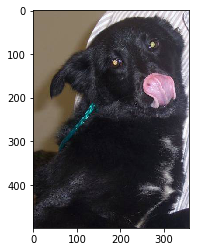

In [37]:
img = plt.imread(f'{PATH}valid/dogs/{files[0]}')
plt.imshow(img);

In [13]:
img.shape

(499, 357, 3)

In [14]:
img[:3,:3]

array([[[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]],

       [[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]],

       [[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]]], dtype=uint8)

In [128]:
!ls {PATH}tmp -lh

total 12K
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_test_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_val_resnet34_0_224.bc


In [129]:
#os.listdir(f'{PATH}/models')
!ls {PATH}/models -lh

total 255M
-rw-rw-r-- 1 paperspace paperspace  84M Feb 21 10:17 224_all_1.h5
-rw-rw-r-- 1 paperspace paperspace  84M Feb 19 10:30 224_all.h5
-rw-rw-r-- 1 paperspace paperspace  84M Feb 21 09:14 224_lastlayer_1.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 19 10:16 224_lastlayer.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 21 10:46 tmp.h5


In [17]:
#!rm -rf {PATH/tmp}

### Basic model

In [18]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.04846    0.026955   0.992188  
    1      0.04169    0.026015   0.992188                     
    2      0.035777   0.027691   0.990723                     



[0.027691368, 0.99072265625]

In [17]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1.6e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.052358   0.032259   0.990723  
    1      0.040233   0.025541   0.991211                     
    2      0.037569   0.026545   0.992188                     



[0.026544612, 0.9921875]

### Analyze results by looking at pictures

In [16]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
data.val_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
data.classes

['cats', 'dogs']

In [19]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [20]:
log_preds[:10]

array([[ -0.00003, -10.35191],
       [ -0.00035,  -7.94596],
       [ -0.00074,  -7.21477],
       [ -0.00008,  -9.37387],
       [ -0.00014,  -8.87941],
       [ -0.00021,  -8.48103],
       [ -0.00001, -11.14687],
       [ -0.00003, -10.29858],
       [ -0.00276,  -5.89316],
       [ -0.00004, -10.12717]], dtype=float32)

In [21]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [22]:
preds.mean(), probs.mean()

(0.4995, 0.49941078)

In [28]:
def rand_by_mask(mask):
    return np.random.choice(np.where(mask)[0], 4, replace=False)

def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y)==is_correct)

In [29]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [30]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

Correctly classified


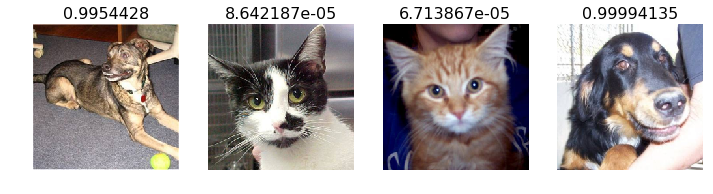

In [31]:
plot_val_with_title(rand_by_correct(True), 'Correctly classified')

Incorrectly classified


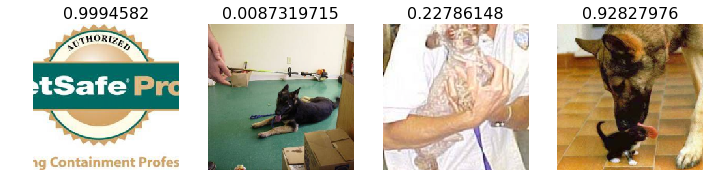

In [32]:
plot_val_with_title(rand_by_correct(False), 'Incorrectly classified')

In [35]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


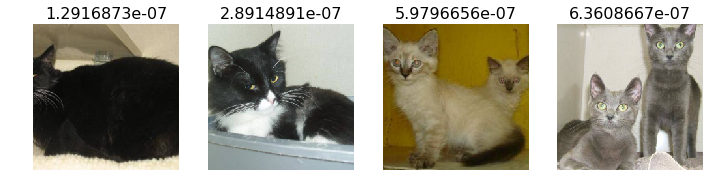

In [36]:
plot_val_with_title(most_by_correct(0, True), 'Most correct cats')

Most correct dogs


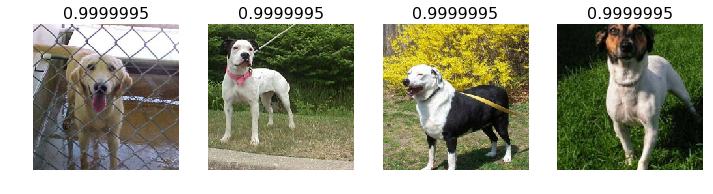

In [37]:
plot_val_with_title(most_by_correct(1, True), 'Most correct dogs')

Most incorrect cats


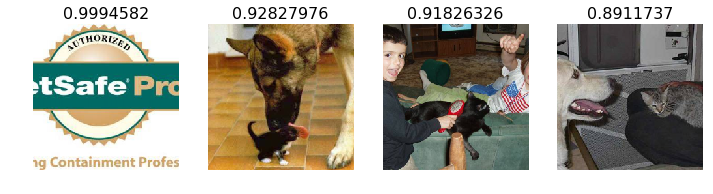

In [39]:
plot_val_with_title(most_by_correct(0, False), 'Most incorrect cats')

Most incorrect dogs


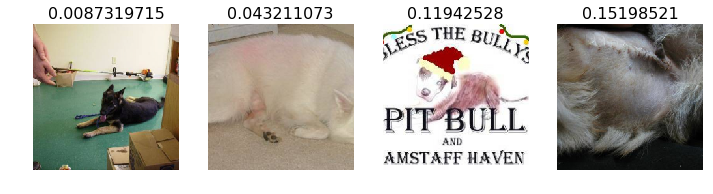

In [40]:
plot_val_with_title(most_by_correct(1, False), 'Most incorrect dogs')

Most uncertain predictions


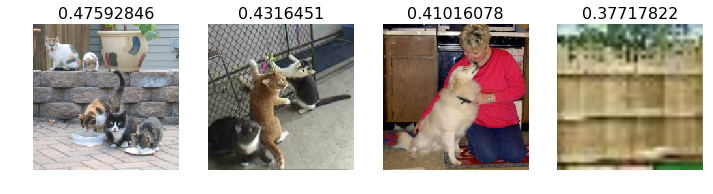

In [41]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, 'Most uncertain predictions')

### Choosing a learning rate

In [31]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▎ | 297/360 [00:05<00:01, 56.51it/s, loss=0.402] 


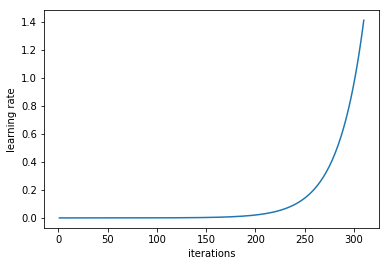

In [38]:
learn.sched.plot_lr()

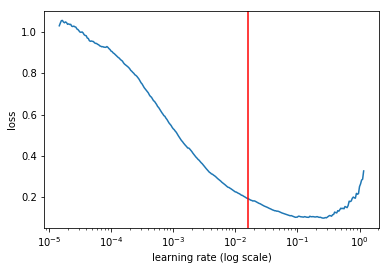

In [42]:
import matplotlib.pyplot as plt
learn.sched.plot()
plt.axvline(x=1.6e-2, color="red");

## Improving the model

### Data augmentation

In [124]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [48]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [49]:
ims = np.stack([get_augs() for i in range(6)])

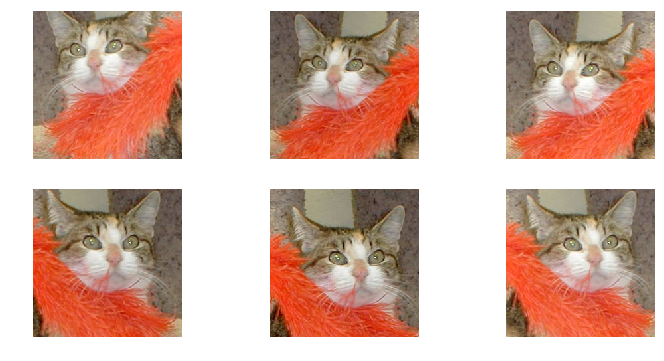

In [51]:
plots(ims, rows=2)

In [125]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [126]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 277/360 [00:04<00:01, 60.08it/s, loss=0.524] 


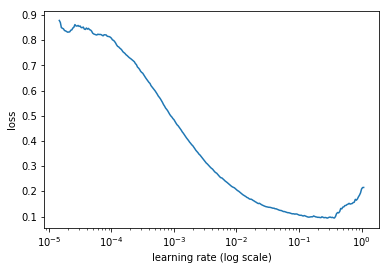

In [127]:
learn.sched.plot()

In [53]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.052458   0.034529   0.987793  



[0.034528572, 0.98779296875]

In [54]:
learn.precompute=False

### learning rate annealing

In [55]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.050459   0.027431   0.989746  
    1      0.045579   0.025766   0.990723                     
    2      0.044437   0.026676   0.990234                     



[0.026675822, 0.990234375]

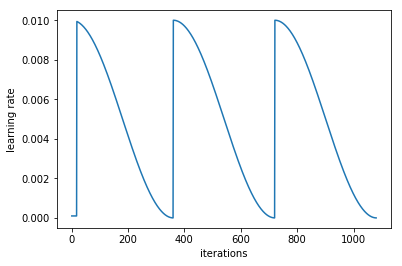

In [56]:
learn.sched.plot_lr()

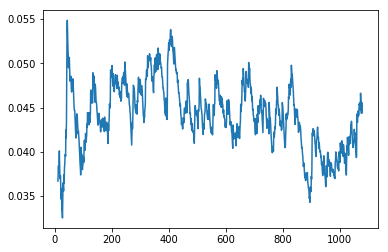

In [58]:
learn.sched.plot_loss()

In [59]:
learn.save('224_lastlayer_1')

In [60]:
learn.load('224_lastlayer_1')

### Fine-tuning and differential learning rate annealing

In [61]:
learn.unfreeze()

In [88]:
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.04668    0.025776   0.990234  
    1      0.035423   0.021341   0.990723                     
    2      0.030635   0.018454   0.992676                     
    3      0.022296   0.01975    0.992188                     
    4      0.025232   0.018745   0.993164                     
    5      0.018634   0.019571   0.991699                     
 67%|██████▋   | 242/360 [03:39<01:46,  1.10it/s, loss=0.0223]

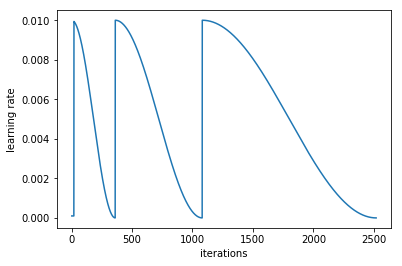

In [91]:
learn.sched.plot_lr()

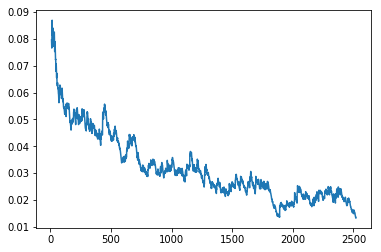

In [93]:
learn.sched.plot_loss()

In [94]:
learn.save('224_all_1')

In [95]:
learn.load('224_all_1')

## Test Time Augmentation

In [115]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [116]:
accuracy_np(probs, y)

0.9945

## Analyzing results

### Confution matrix

In [118]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[994   6]
 [  5 995]]


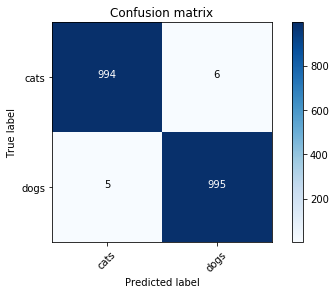

In [120]:
plot_confusion_matrix(cm, data.classes)

#### Looking at pictures again

Most incorrect cats


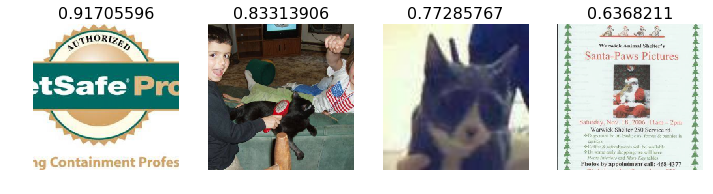

In [121]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


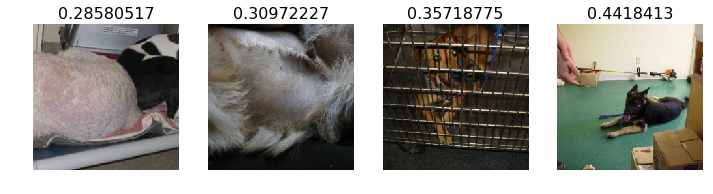

In [122]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


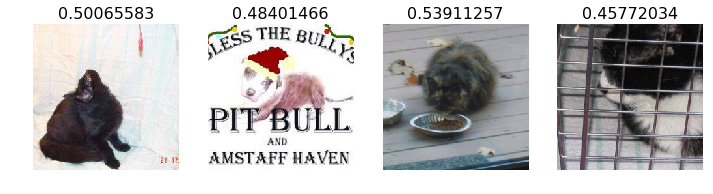

In [123]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, 'Most uncertain predictions')

### Analyzing results: loss and accuracy

In [86]:
def binary_loss(y, p):
    #return np.mean(-(y*np.log(p)+(1-y)*np.log(1-p)))
    loss = 0.0
    for i in range(len(y)):
        if y[i] == 1:
            loss += -np.log(p[i])
        else:
            loss += -np.log(1-p[i])
    return loss / len(y)

In [87]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.98, 0.05, 0.01, 0.95])

binary_loss(acts, preds)

0.03320990798653052